In [2]:
import pandas as pd

In [54]:
results = pd.read_csv('/home/shiftpub/AMM-Python/results/dummy_results/newa_results_spread_0.01_dt_0.0003_20241001_163609.csv')

print(results.head())
print(results.columns)

   sigma  fee_rate       pnl       fee  volume  price_distance  dynamic_fee  \
0  0.005    0.0005  2.102769  0.000307    5000        1.453911       0.0005   
1  0.005    0.0005  2.175993  0.000332    5000        1.487188       0.0005   
2  0.005    0.0005  2.088854  0.000310    5000        1.404695       0.0005   
3  0.005    0.0005  2.050701  0.000285    5000        1.360801       0.0005   
4  0.005    0.0005  1.725148  0.000258    5000        1.346377       0.0005   

   total_transactions  
0        61409.515313  
1        66331.452685  
2        61904.760163  
3        56953.105721  
4        51732.887073  
Index(['sigma', 'fee_rate', 'pnl', 'fee', 'volume', 'price_distance',
       'dynamic_fee', 'total_transactions'],
      dtype='object')


In [62]:
print(f"unique sigma: {results['sigma'].unique()}")
print(f"unique fee rate: {results['fee_rate'].unique()}")
# extract rows for the first 100 fee rates
fee_rates = results['fee_rate'].unique()[:50]
results = results[results['fee_rate'].isin(fee_rates)]

unique sigma: [0.005 0.006 0.007 0.008 0.009 0.01 ]
unique fee rate: [0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045 0.005
 0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095 0.01
 0.0105 0.011  0.0115 0.012  0.0125 0.013  0.0135 0.014  0.0145 0.015
 0.0155 0.016  0.0165 0.017  0.0175 0.018  0.0185 0.019  0.0195 0.02
 0.0205 0.021  0.0215 0.022  0.0225 0.023  0.0235 0.024  0.0245 0.025
 0.0255 0.026  0.0265 0.027  0.0275 0.028  0.0285 0.029  0.0295 0.03
 0.0305 0.031  0.0315 0.032  0.0325 0.033  0.0335 0.034  0.0345 0.035
 0.0355 0.036  0.0365 0.037  0.0375 0.038  0.0385 0.039  0.0395 0.04
 0.0405 0.041  0.0415 0.042  0.0425 0.043  0.0435 0.044  0.0445 0.045
 0.0455 0.046  0.0465 0.047  0.0475 0.048  0.0485 0.049  0.0495 0.05  ]


<Axes: xlabel='fee_rate', ylabel='fee'>

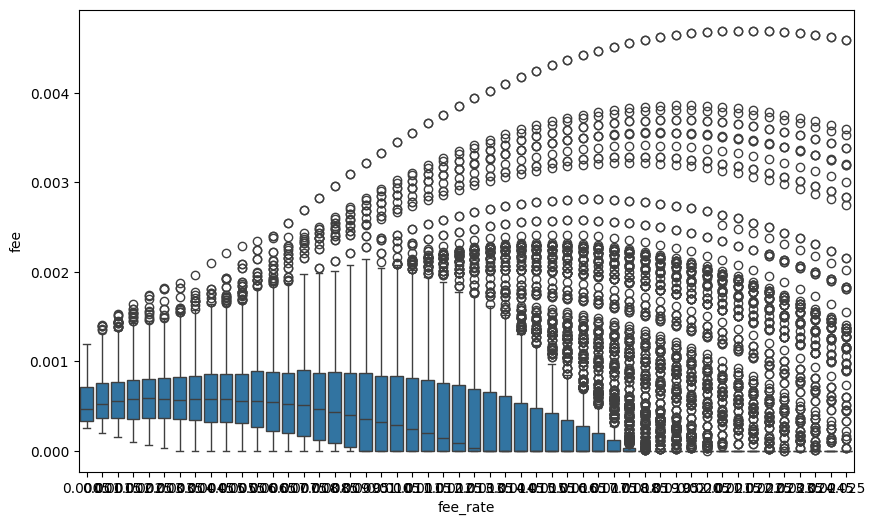

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# sns.boxplot(x='fee_rate', y='fee', hue='sigma', data=results)
sns.boxplot(x='fee_rate', y='fee', data=results)

<Axes: xlabel='fee_rate', ylabel='pnl'>

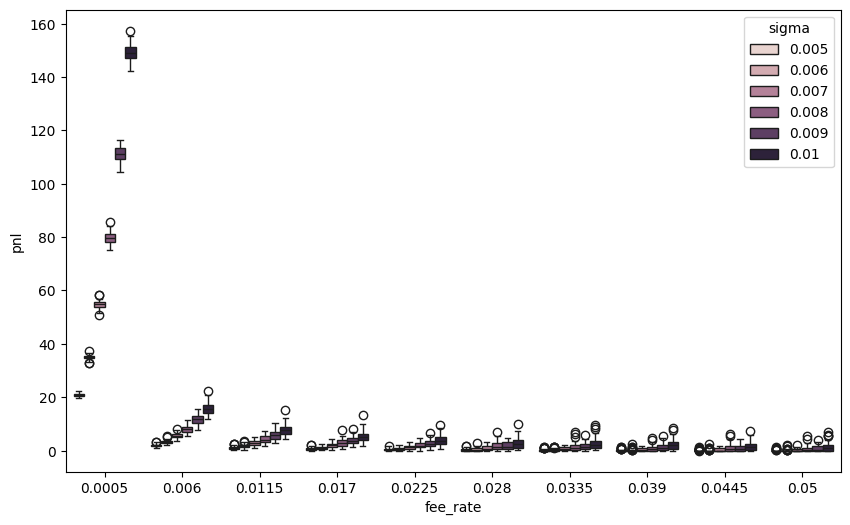

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fee_rate', y='pnl', hue='sigma', data=results)

Text(0.5, 1.0, 'Trading Volume')

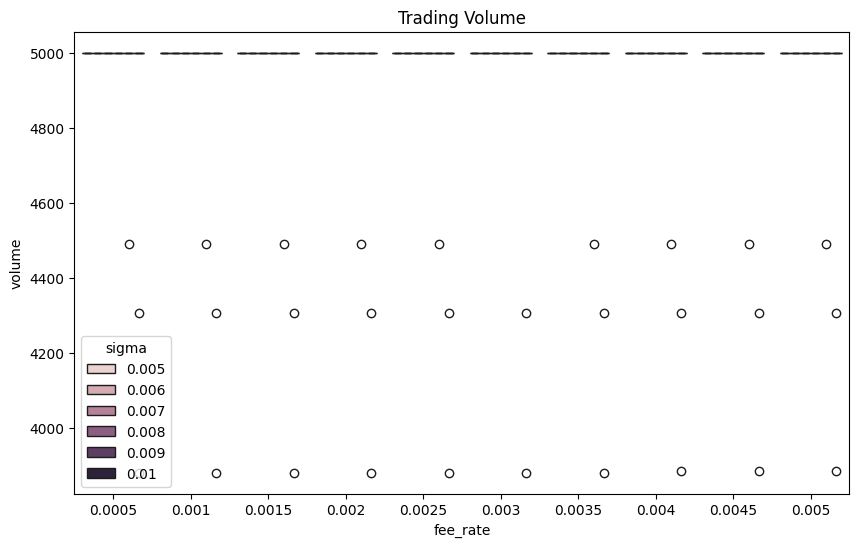

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fee_rate', y='volume', hue='sigma', data=results)
plt.title('Trading Volume')

Text(0.5, 1.0, 'Total Transactions')

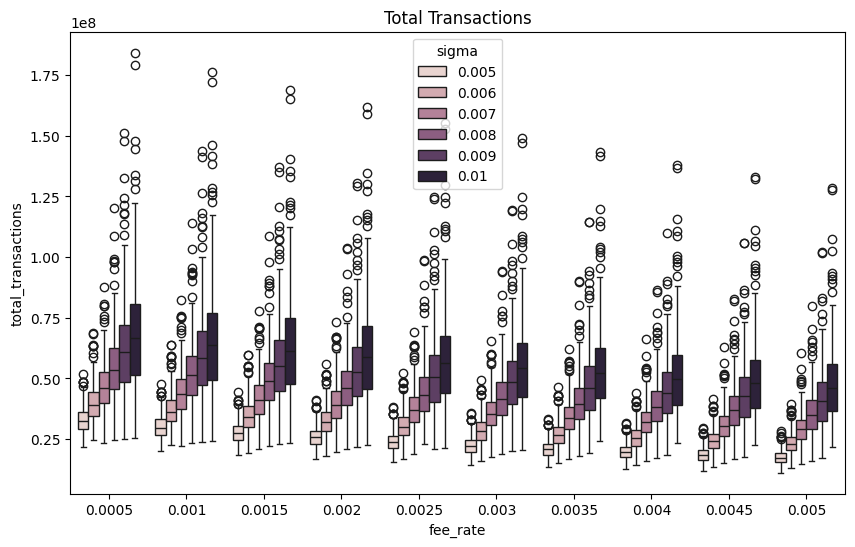

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='fee_rate', y='total_transactions', hue='sigma', data=results)
plt.title('Total Transactions')

unique_sigma: [0.005 0.006 0.007 0.008 0.009 0.01 ] | fee_bins: [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035, 0.004, 0.0045, 0.005]


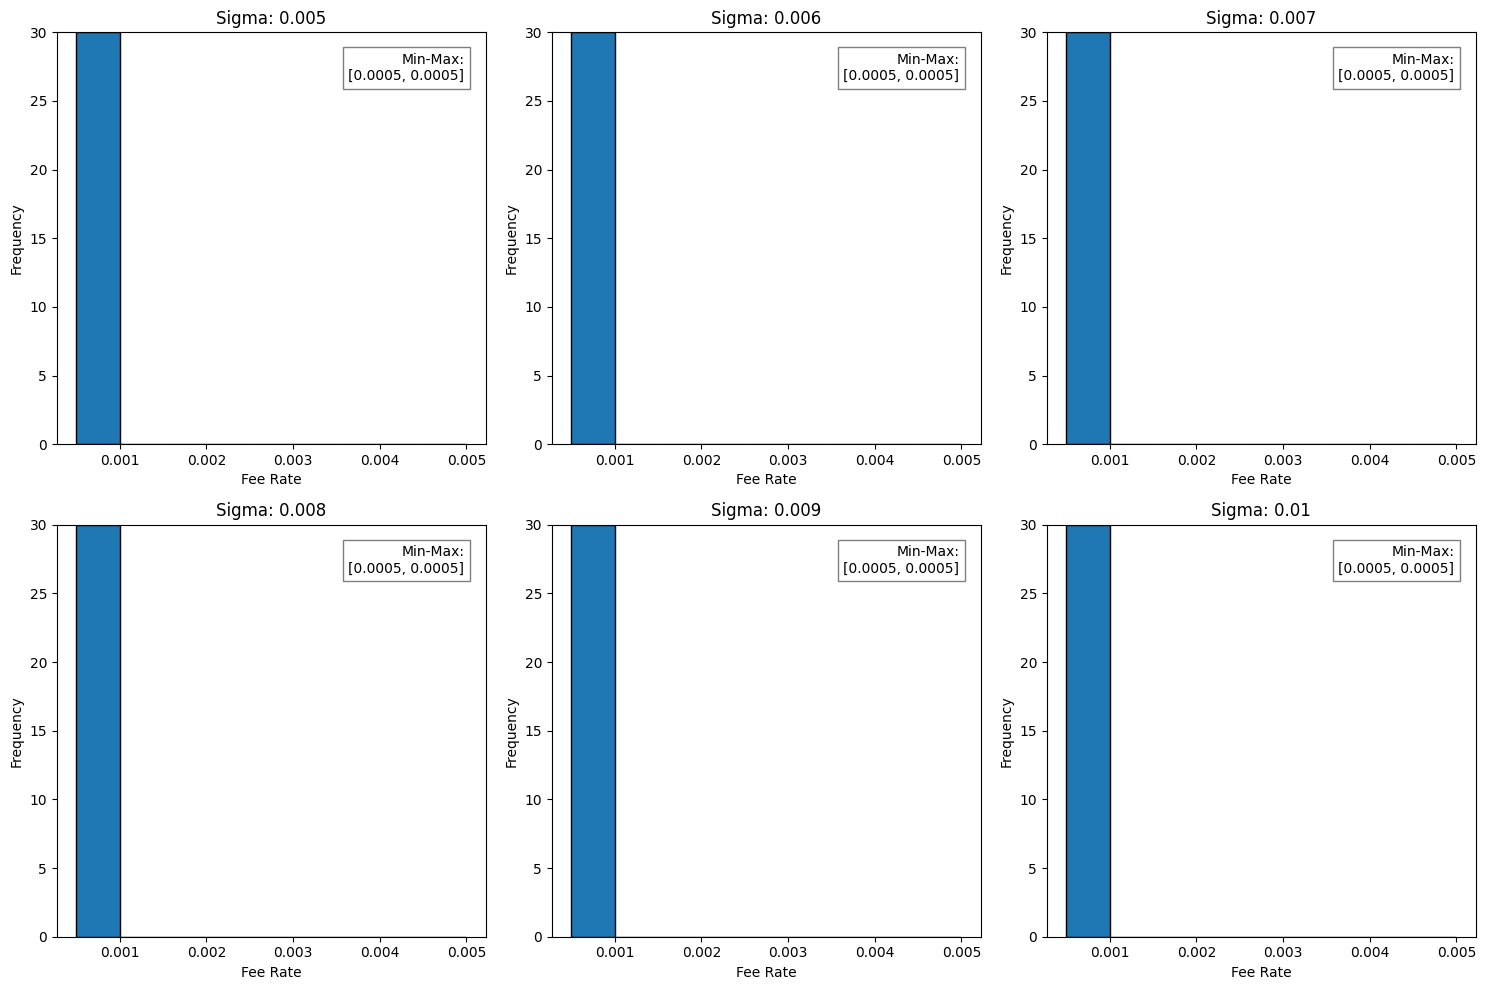

In [8]:
import matplotlib.pyplot as plt

# Get unique sigma and fee_rate values
unique_sigma = results.sigma.unique()
unique_fee = results.fee_rate.unique()[:-1]  # Adjust this slice as needed

# Convert unique_fee to numeric values
fee_bins = sorted([float(fee) for fee in unique_fee])

# Print unique values for reference
print(f"unique_sigma: {unique_sigma} | fee_bins: {fee_bins}")

# Create subplots (2 rows and 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figure size as needed

# Loop through each unique sigma value
for idx, sigma in enumerate(unique_sigma):
    # Calculate row and column for the subplot
    row = idx // 3
    col = idx % 3
    
    # Filter the DataFrame for the current sigma and 'rl' fee_rate
    df = results[(results['sigma'] == sigma) & (results['fee_rate'] == 'rl')]

    # Plot the histogram using fee_bins as bin edges
    ax[row, col].hist(df['dynamic_fee'], bins=fee_bins, edgecolor='black')
    
    # Calculate min and max bounds
    min_bound = df['dynamic_fee'].min()
    max_bound = df['dynamic_fee'].max()
    
    # Set the title for sigma only
    ax[row, col].set_title(f'Sigma: {sigma}')
    
    # Annotate the plot with the min and max bounds
    ax[row, col].text(0.95, 0.95, f'Min-Max:\n[{min_bound:.4f}, {max_bound:.4f}]',
                      verticalalignment='top', horizontalalignment='right',
                      transform=ax[row, col].transAxes, fontsize=10,
                      bbox=dict(facecolor='white', alpha=0.5))
    
    # Set labels and limits
    ax[row, col].set_xlabel('Fee Rate')
    ax[row, col].set_ylabel('Frequency')
    ax[row, col].set_ylim(0, 30)  # Adjust the y-axis limit as needed

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

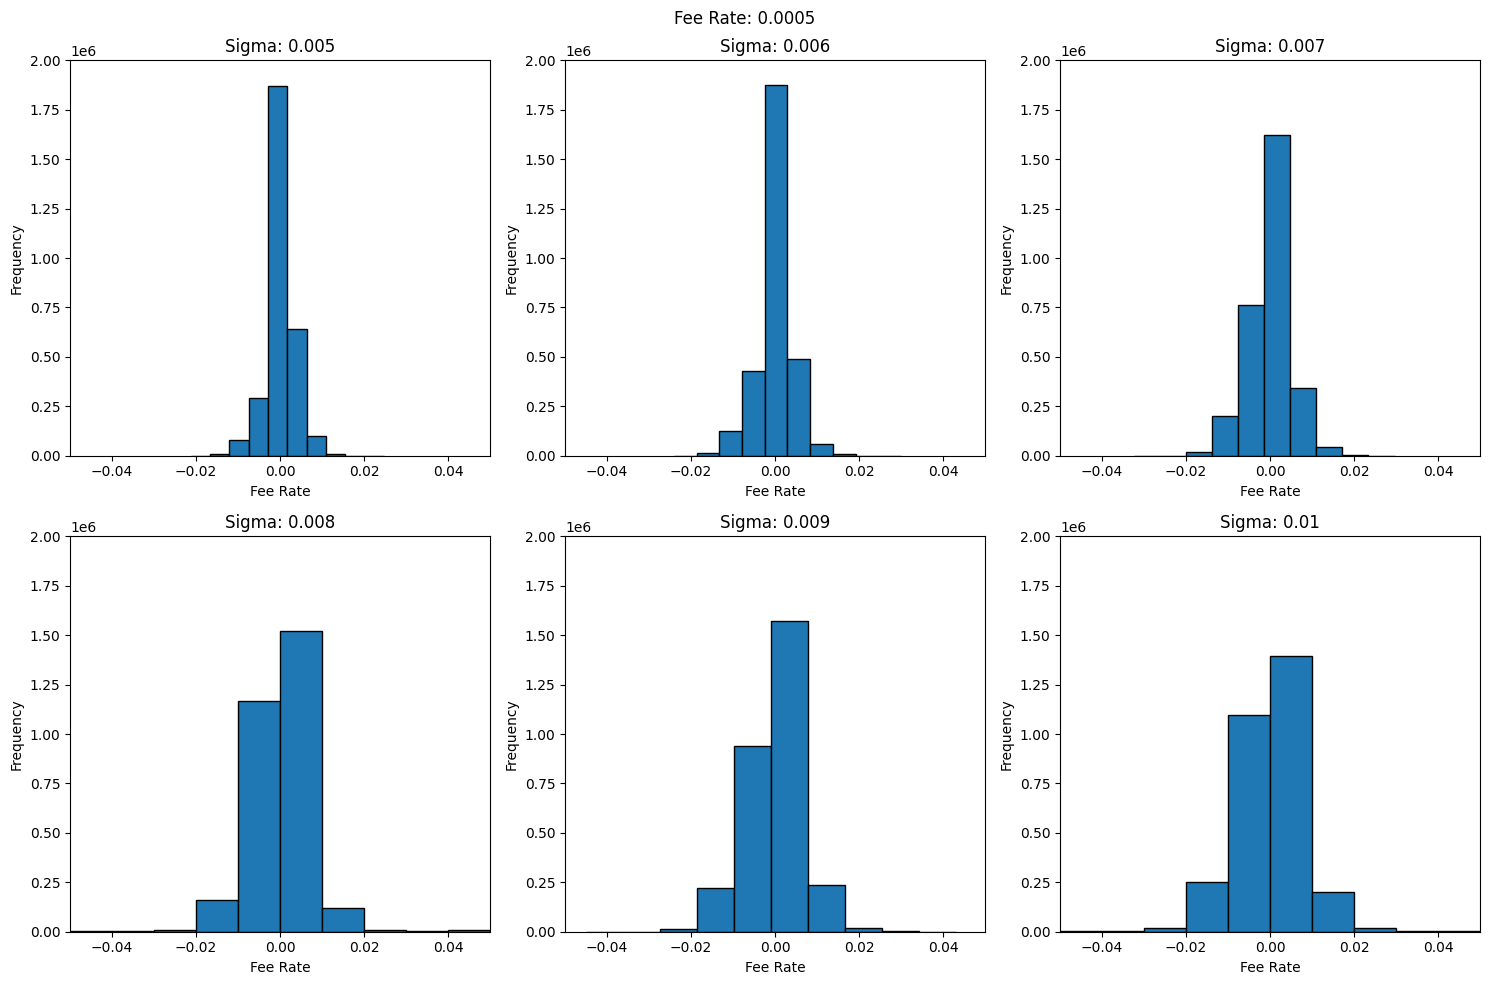

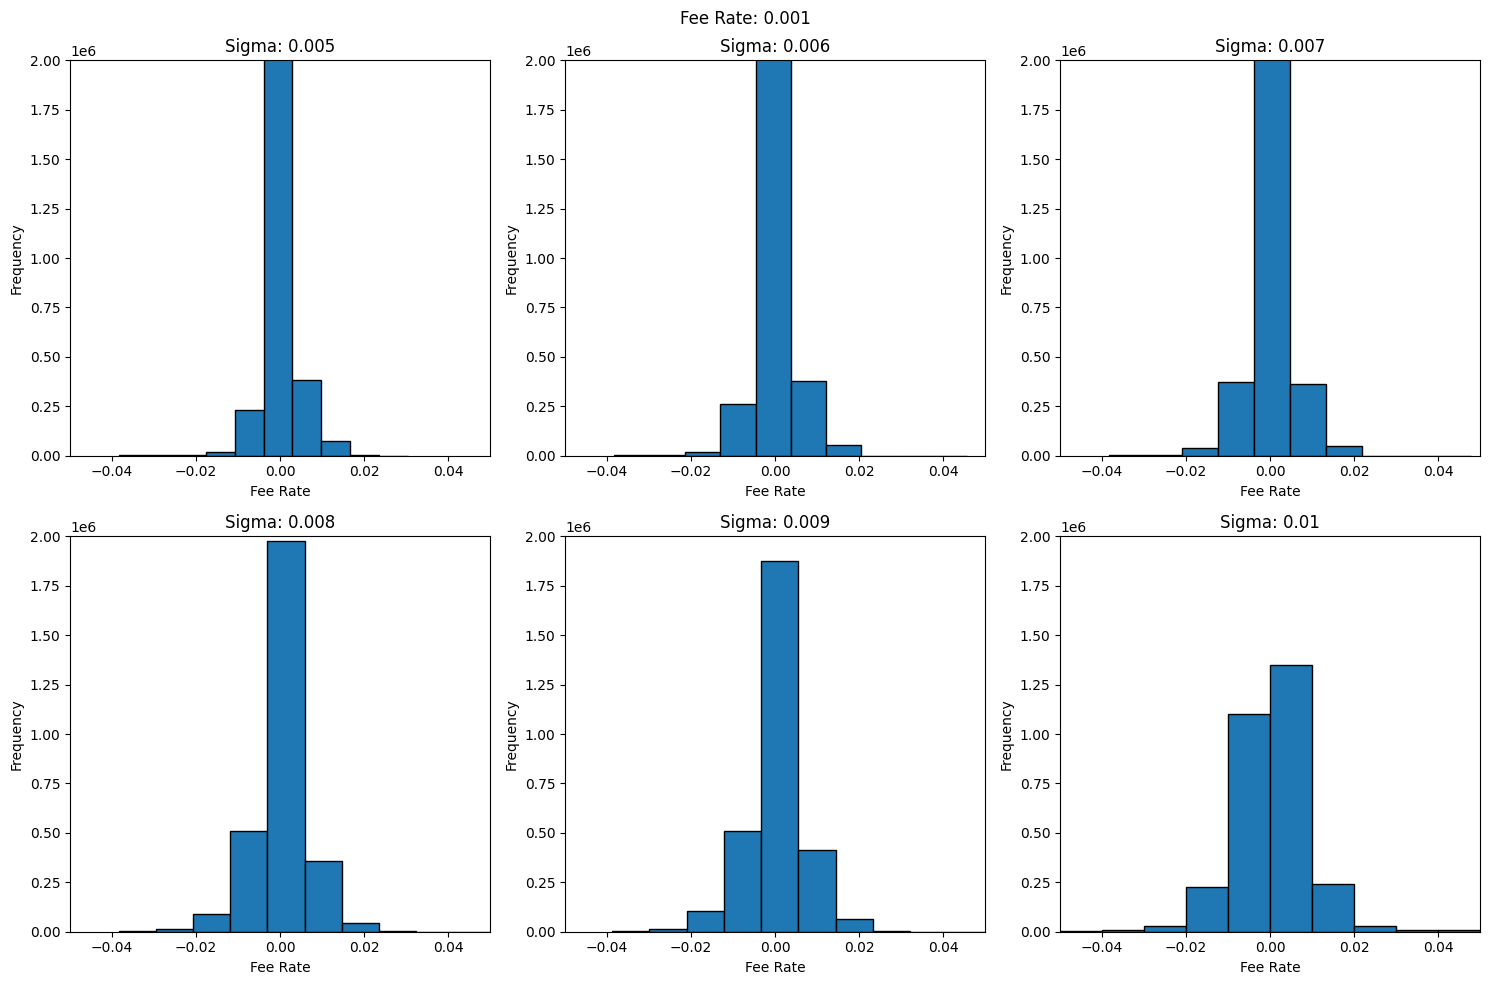

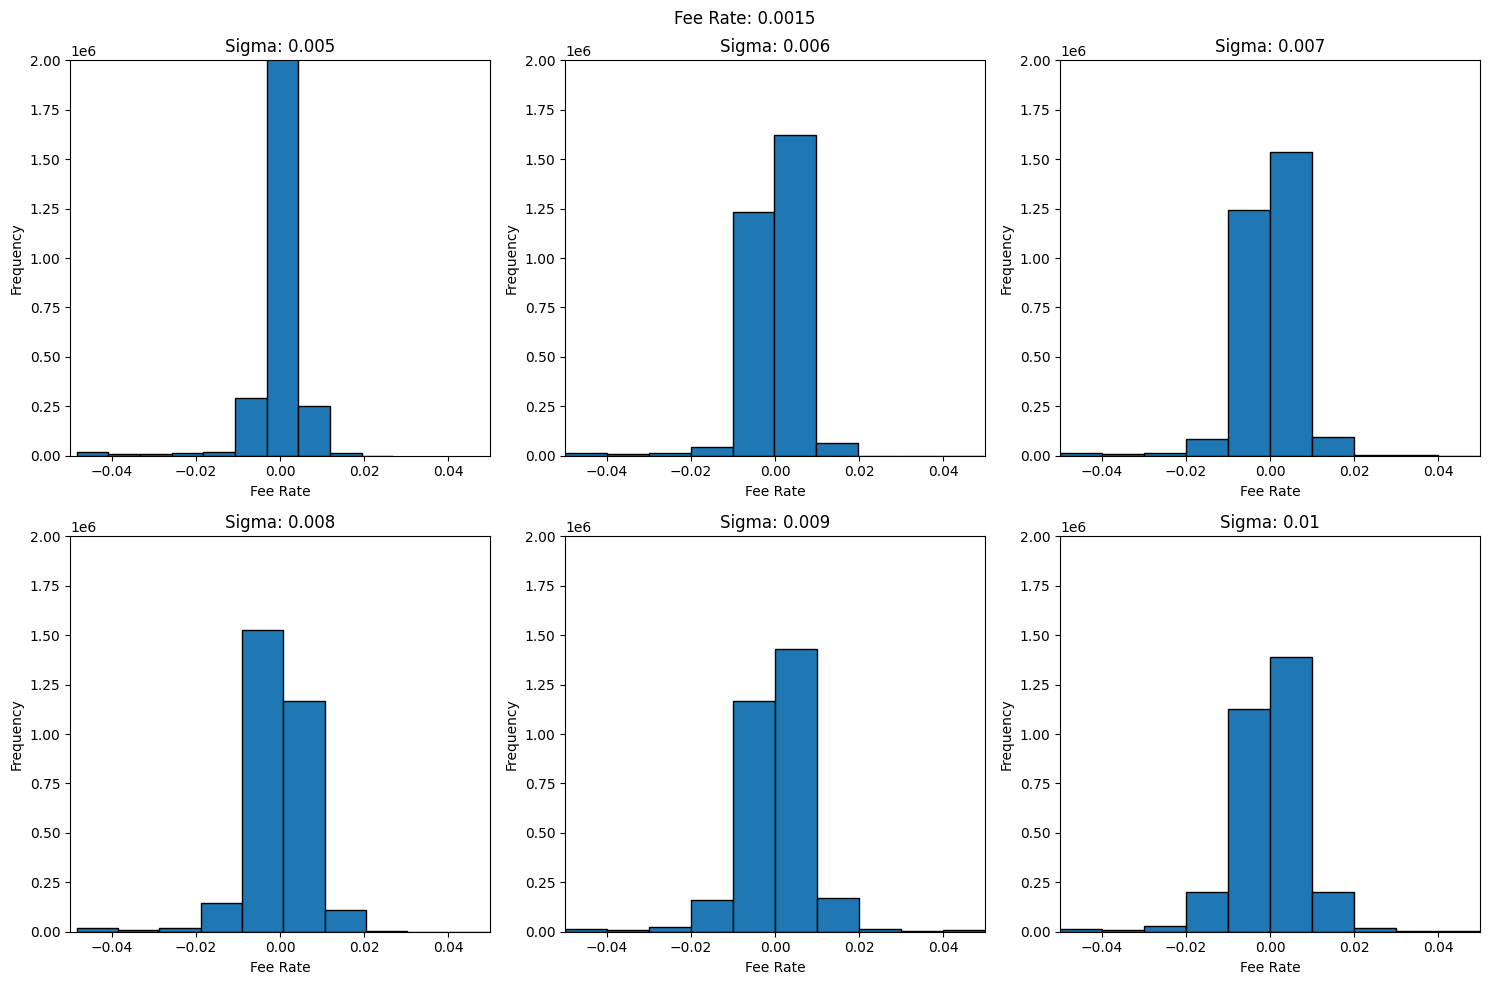

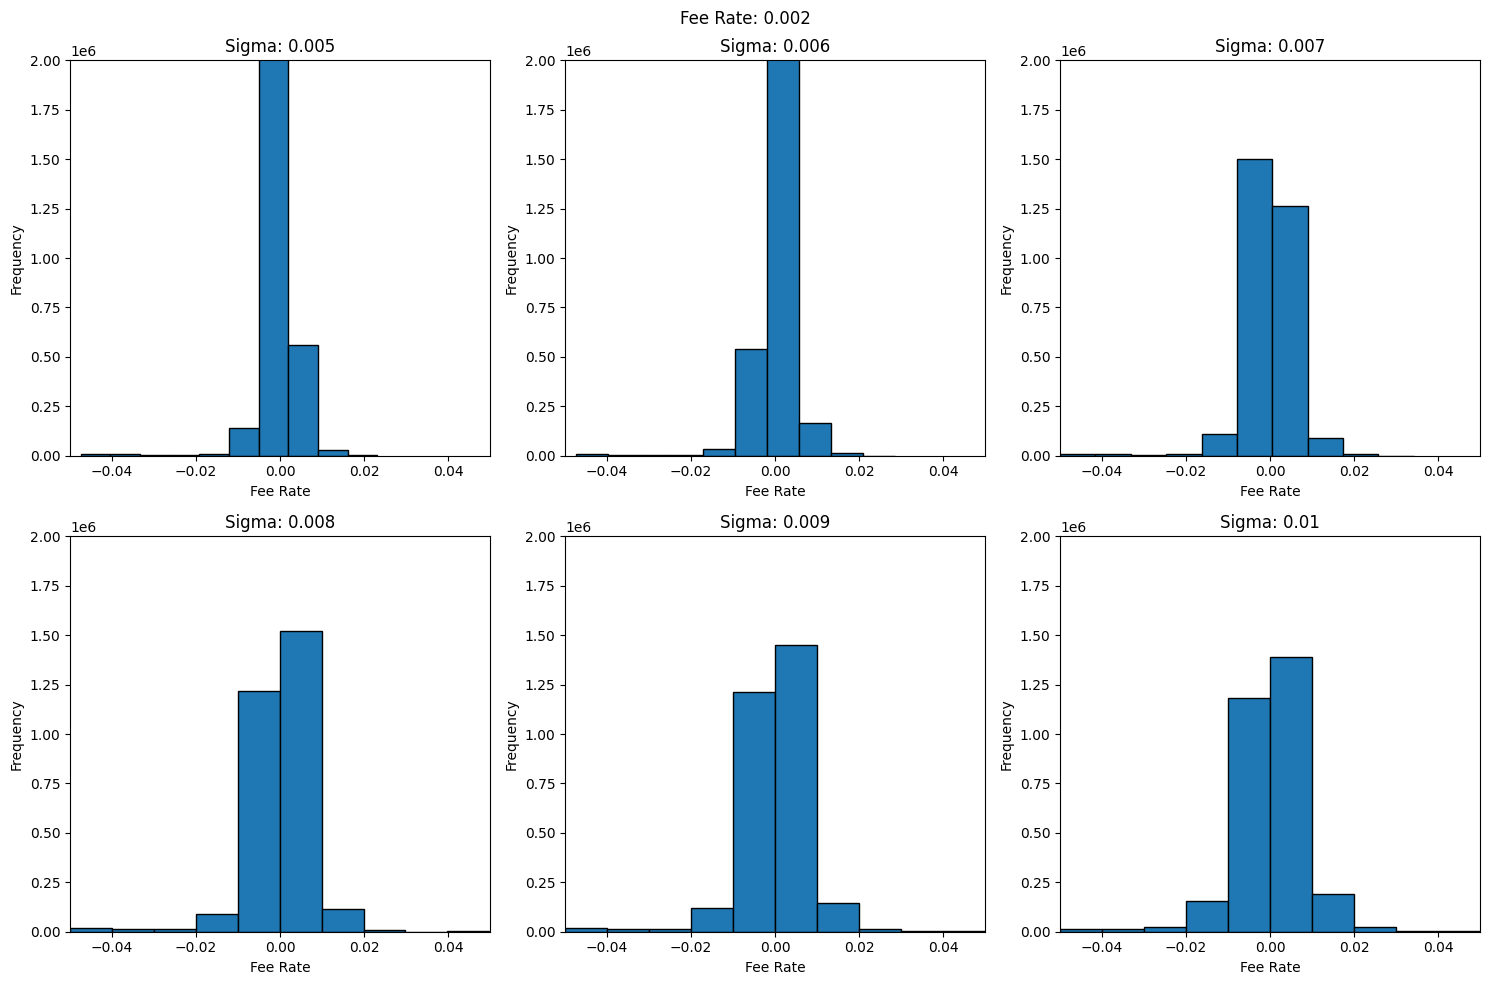

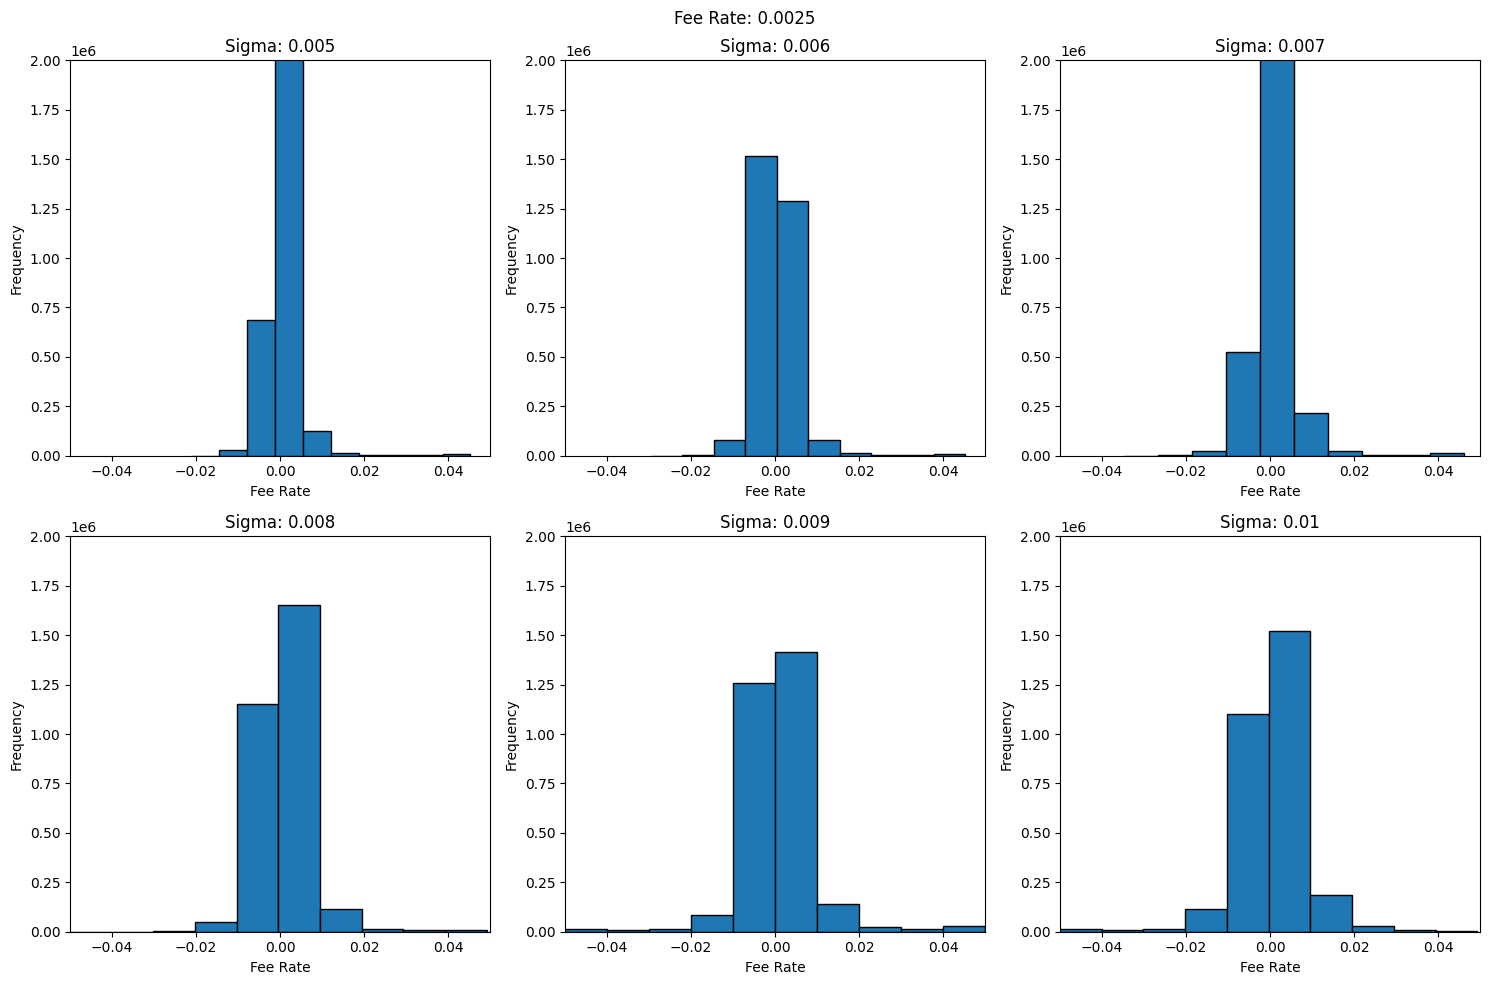

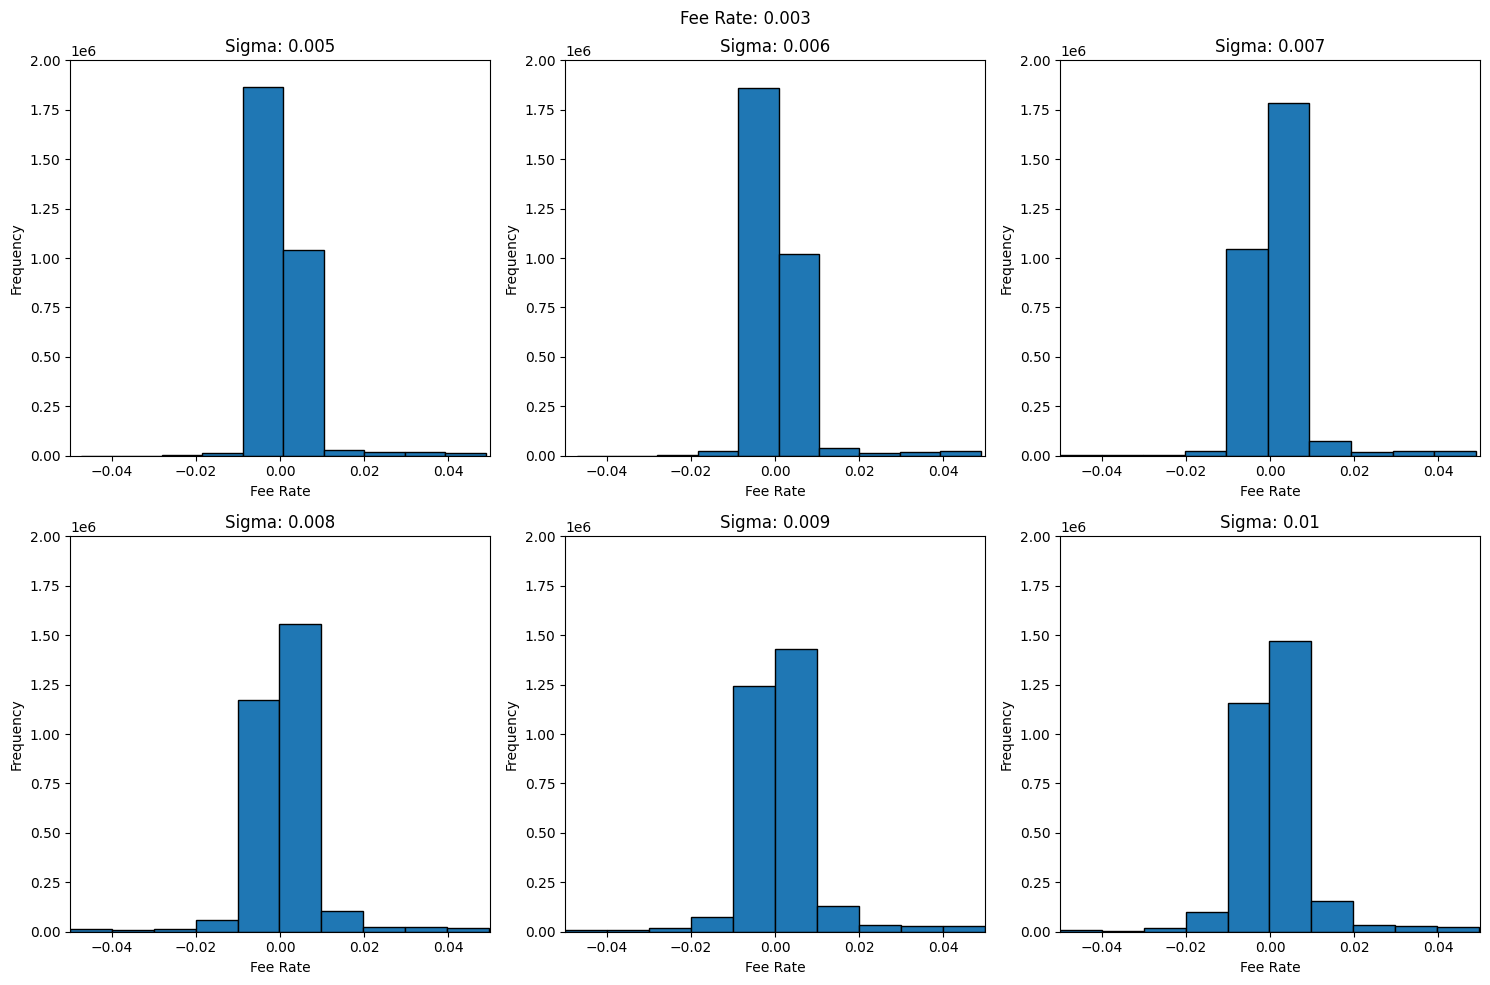

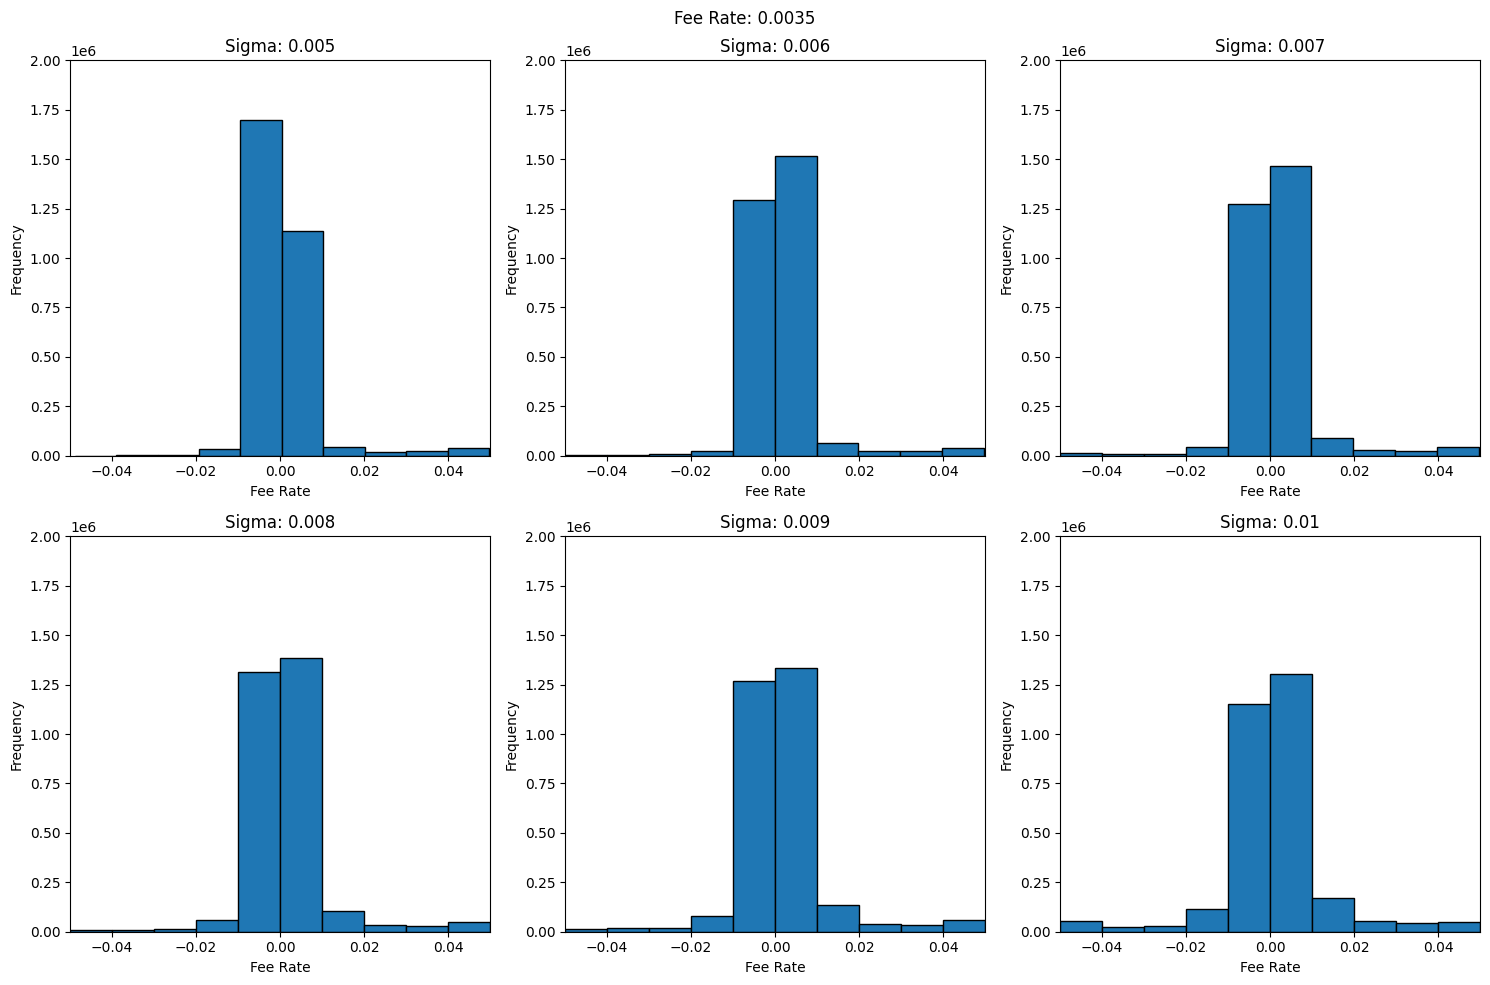

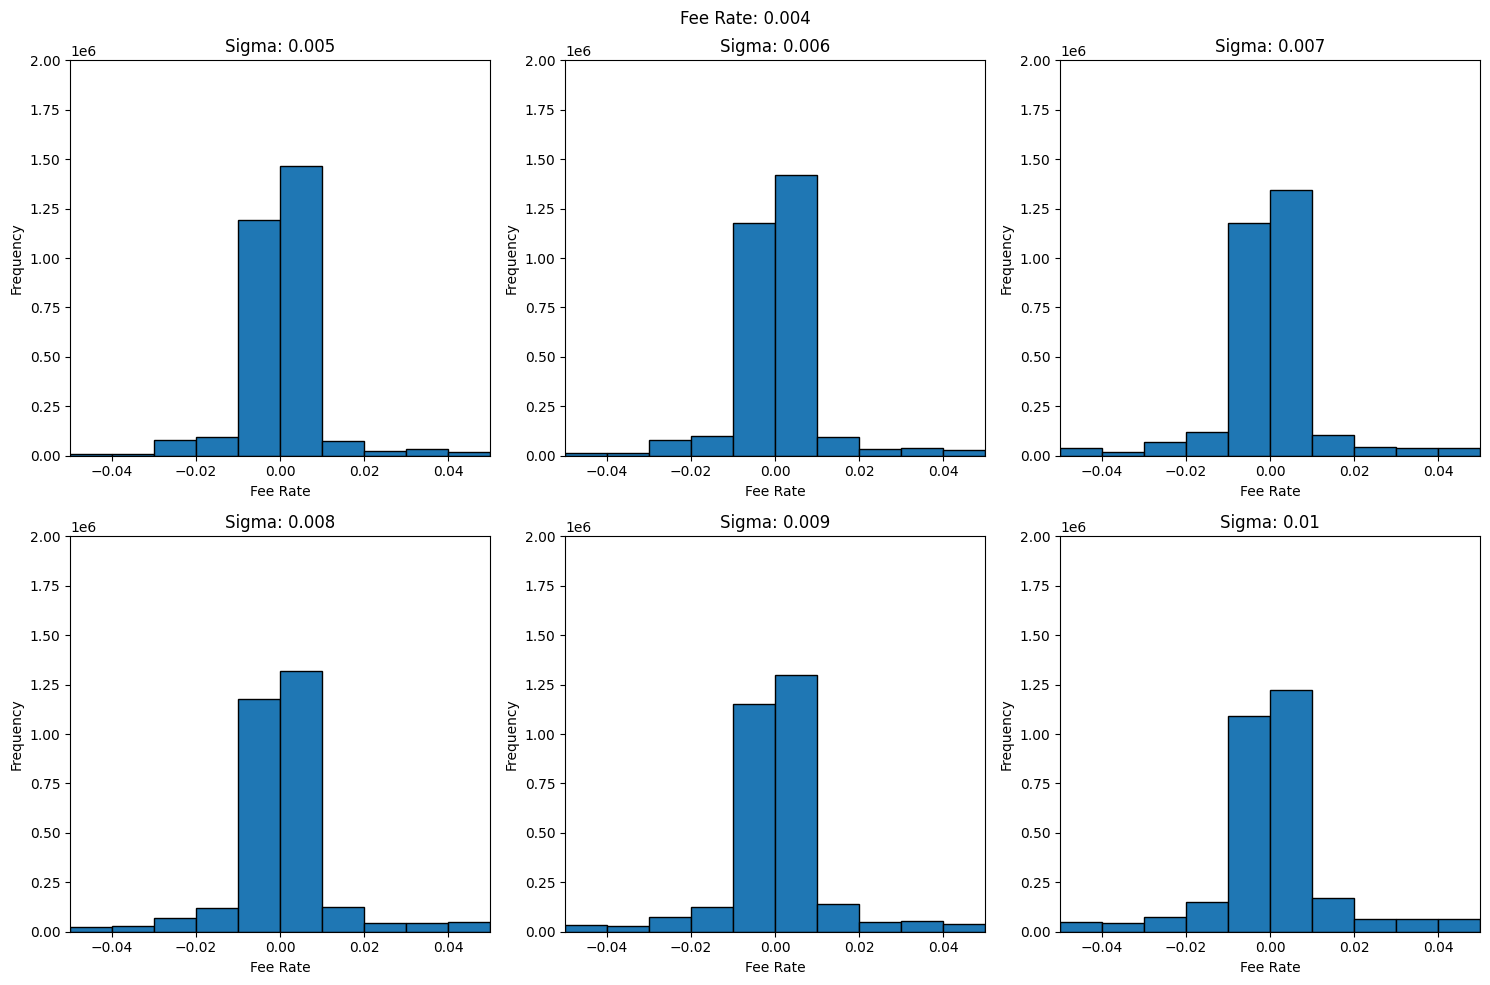

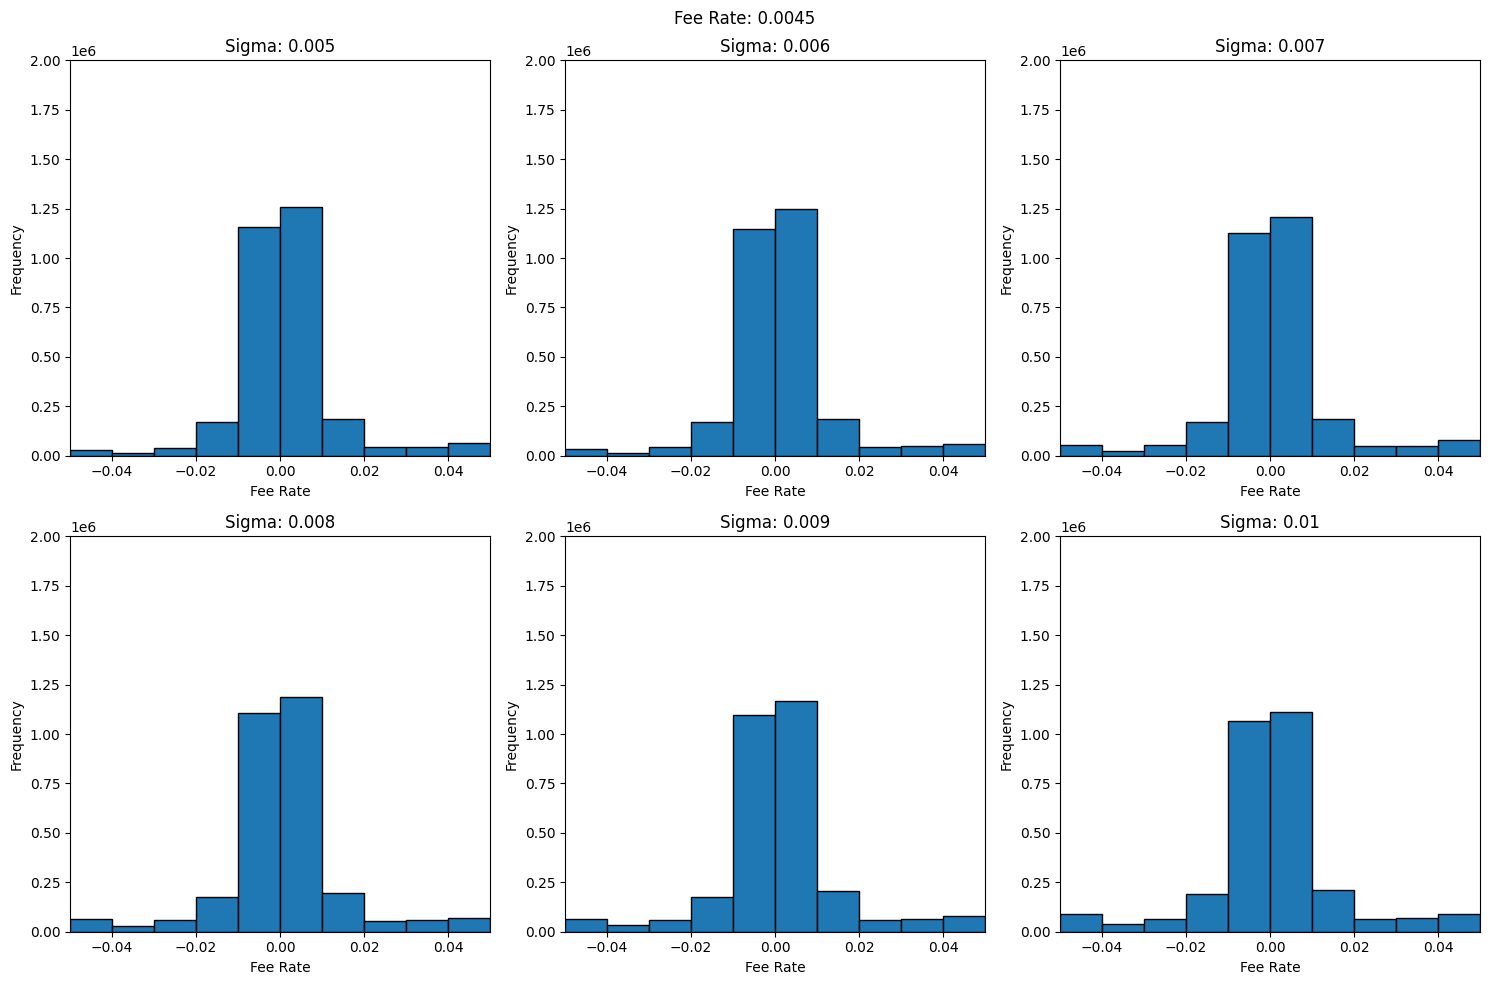

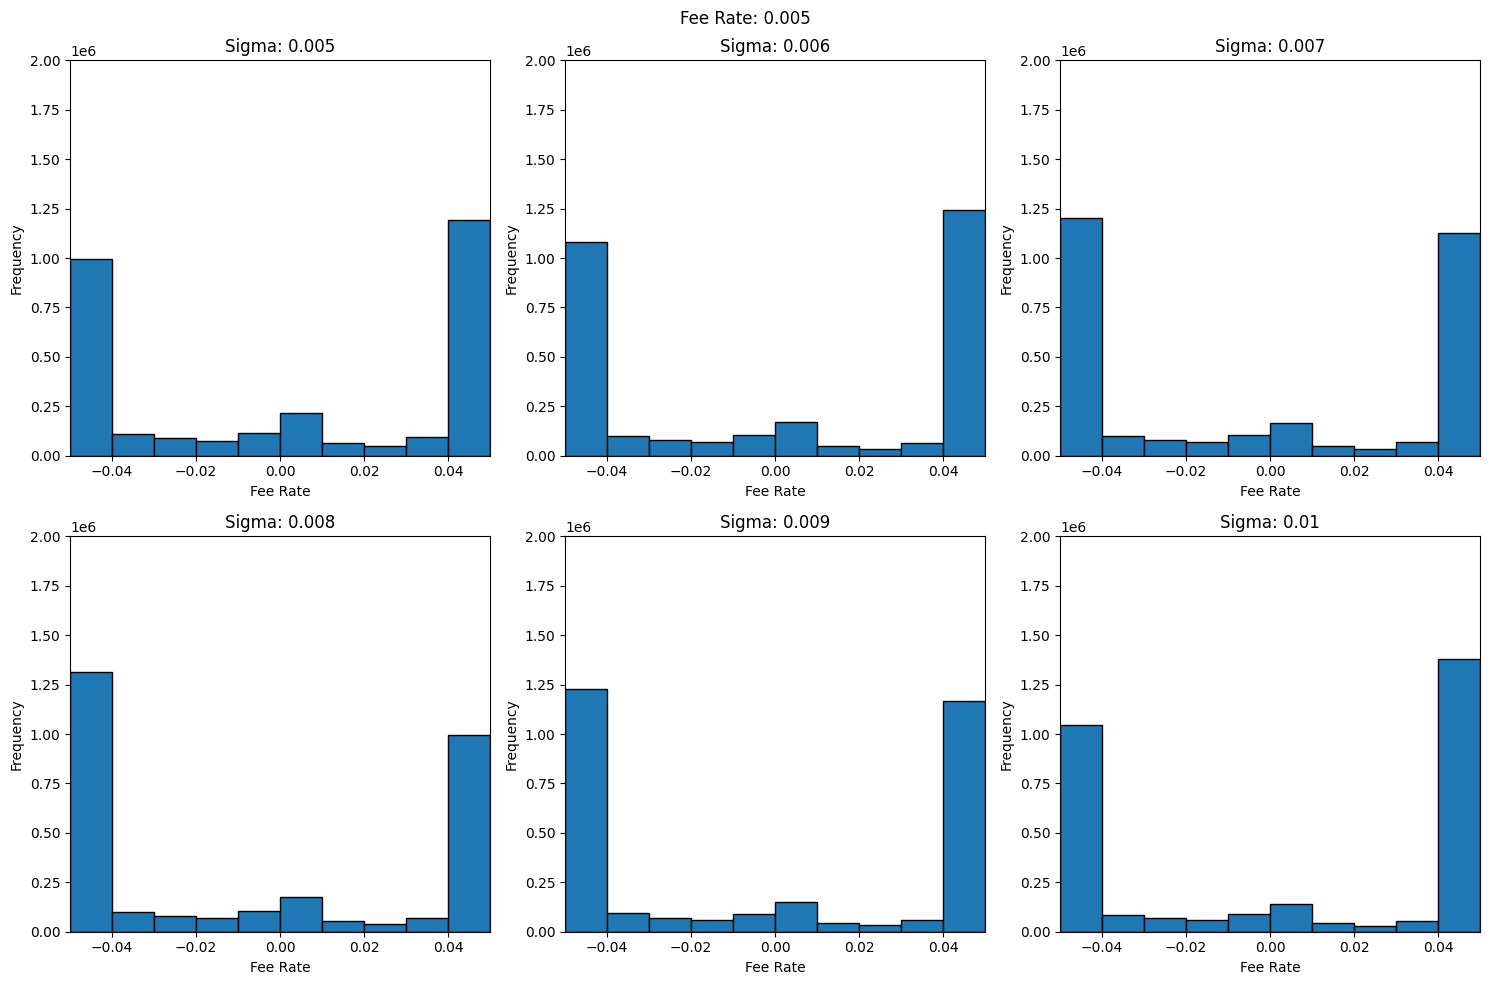

In [43]:
import os
for fee_rate_set in unique_fee:
    # import trader transations for each sigma for fee rate of 0.0005
    root_dir = '/home/shiftpub/AMM-Python/exp/final_results/intermediate_results_20240916_005754'
    all_trader_df = pd.DataFrame()
    for sigma in unique_sigma:
        trader_df_folder = f'{root_dir}/sigma_{sigma}/fee_{fee_rate_set}'
        # load the csv file in the folder beginning with 'trader_transactions'
        files = [f for f in os.listdir(trader_df_folder) if f.startswith('trader_transactions')]
        for file in files:
            trader_df = pd.read_csv(f'{trader_df_folder}/{file}')
            trader_df['sigma'] = sigma
            # concatenate the dataframes
            all_trader_df = pd.concat([all_trader_df, trader_df])
            # print(f"load {file}")
            
    # Create subplots (2 rows and 3 columns)
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # Adjust the figure size as needed

    # Loop through each unique sigma value
    for idx, sigma in enumerate(unique_sigma):
        # Calculate row and column for the subplot
        row = idx // 3
        col = idx % 3
        
        # Filter the DataFrame for the current sigma and 'rl' fee_rate
        df = all_trader_df[(all_trader_df['sigma'] == sigma)]

        # Plot the histogram using fee_bins as bin edges
        ax[row, col].hist(df['trader_swap_rate'], bins=10, edgecolor='black')
        ax[row, col].set_title(f'Sigma: {sigma}')
        ax[row, col].set_xlabel('Fee Rate')
        ax[row, col].set_ylabel('Frequency')
        # fix x aixs and y axis range
        ax[row, col].set_ylim(0, 2*int(1e6))
        ax[row, col].set_xlim(-0.05, 0.05)

    # Adjust layout to prevent overlapping
    plt.suptitle(f'Fee Rate: {fee_rate_set}')
    plt.tight_layout()
    plt.show()

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


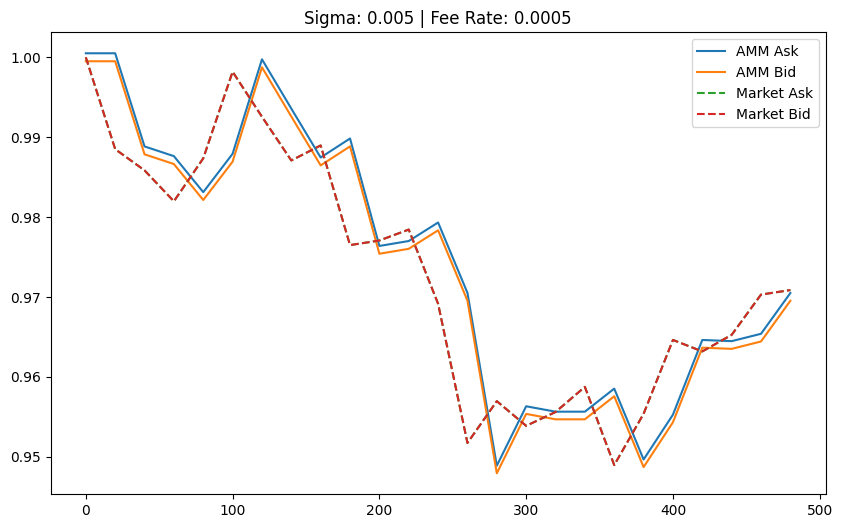

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


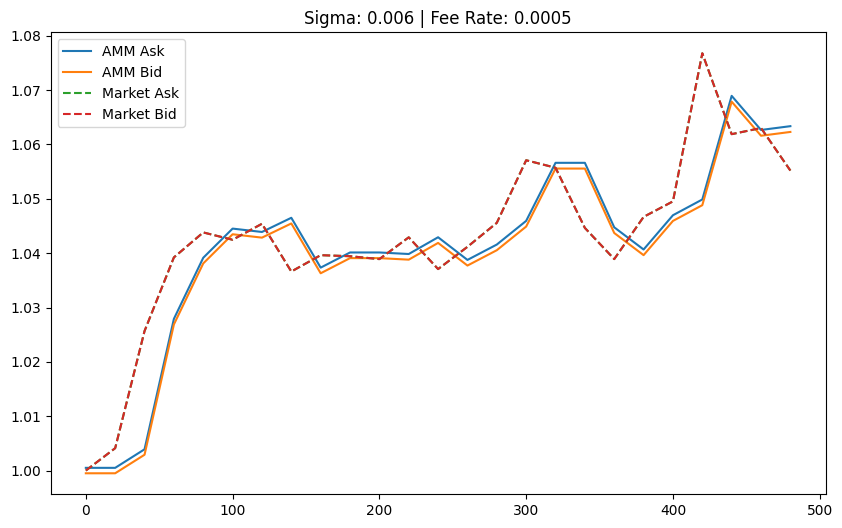

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


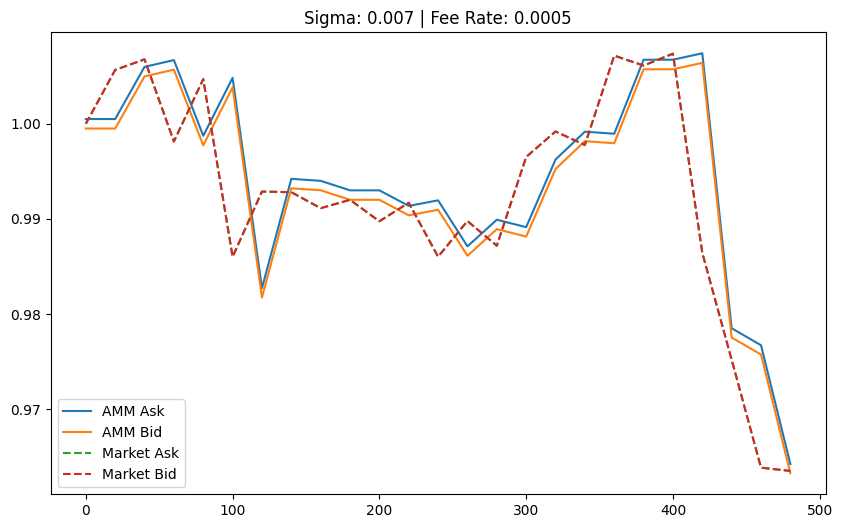

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


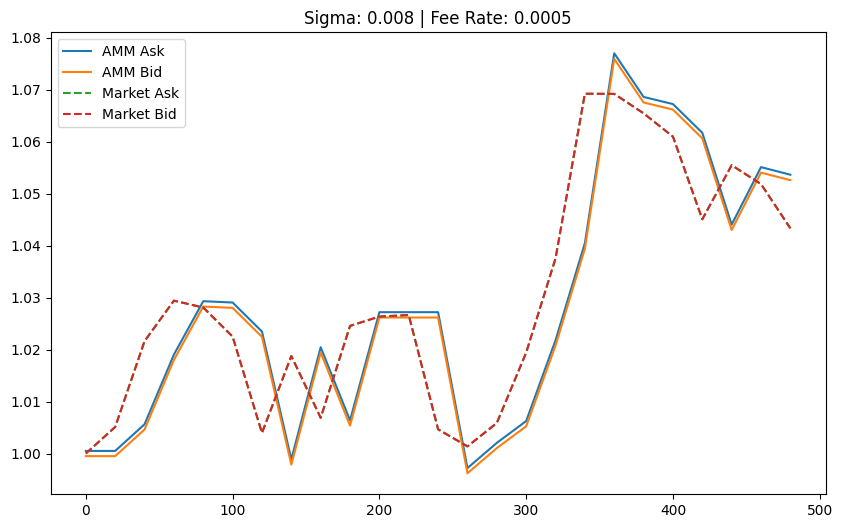

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


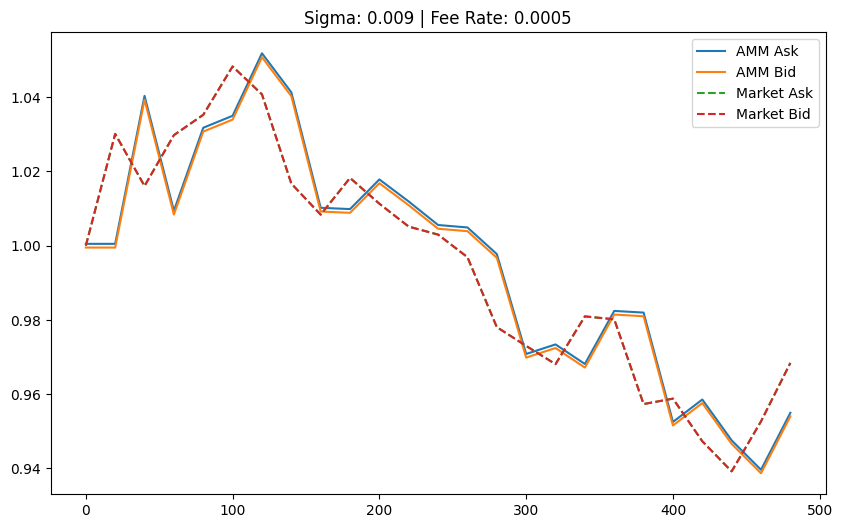

   amm_ask  amm_bid  market_ask  market_bid  amm_fee_rate  trader_swap_rate  \
0   1.0005   0.9995         1.0         1.0        0.0005          0.004144   
1   1.0005   0.9995         1.0         1.0        0.0005          0.001168   
2   1.0005   0.9995         1.0         1.0        0.0005         -0.001974   
3   1.0005   0.9995         1.0         1.0        0.0005          0.003364   
4   1.0005   0.9995         1.0         1.0        0.0005          0.002959   

   trader_urgent_level  trader_mc  
0             0.000601       0.05  
1             0.000647       0.10  
2             0.000598       0.15  
3             0.000508       0.20  
4             0.000691       0.25  


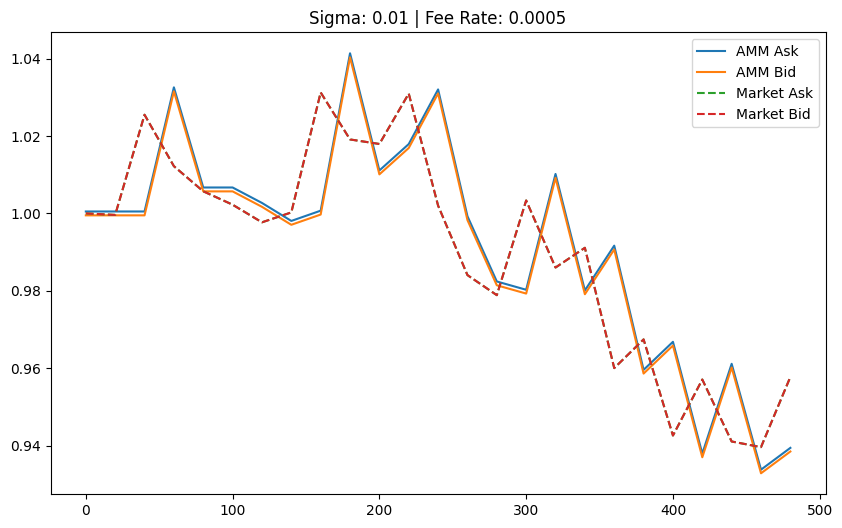

In [71]:
import pandas as pd
import glob

# Define the file pattern using *
for sigma in unique_sigma:
    fee_rate = 0.0005
    file_pattern = f'/home/shiftpub/AMM-Python/exp/final_results/intermediate_results_20240916_005754/sigma_{sigma}/fee_{fee_rate}/trader_transactions_sigma_{sigma}_fee_{fee_rate}_*.csv'

    # Use glob to find the file matching the pattern
    file_list = glob.glob(file_pattern)

    # Load the first matching file into a DataFrame
    if file_list:
        path_df = pd.read_csv(file_list[0])  # Assuming you want the first match
        print(path_df.head())
    else:
        print("No files matched the pattern.")
        
    plt.figure(figsize=(10, 6))
    plt.plot(path_df.iloc[:500:20]['amm_ask'])
    plt.plot(path_df.iloc[:500:20]['amm_bid'])
    plt.plot(path_df.iloc[:500:20]['market_ask'], linestyle='--')
    plt.plot(path_df.iloc[:500:20]['market_bid'], linestyle='--')
    plt.legend(['AMM Ask', 'AMM Bid', 'Market Ask', 'Market Bid'])
    plt.title(f'Sigma: {sigma} | Fee Rate: {fee_rate}')
    plt.show()